# Volúmenes finitos para una ecuación de difusión 1d

Dado el dato $\beta\in\mathbb R$ (se puede generalizar a una función $\beta(x)$), planteamos hallar $q=q(x,t)$ tal que
$$
q_t = \beta q_{xx} 
$$

Lo anterior lo podemos escribir como una ley de conservación
$$
q_t + (f(q))_x = 0
$$
para el flujo $f(q_x)=-\beta q_x$.


### Método de los volúmenes finitos para una ecuación de difusión 1d

Método de los volúmenes finitos para la ecuación de difusión:
$$
Q^{n+1}_i = Q^n_i - \frac{\Delta t}{\Delta x} (F^{n}_{i+1/2} - F^{n}_{i-1/2}),
$$
donde $F^n$ se define de modo que sea proporcional a la diferencia de $Q$ entre dos celdas:
$$
F^n_{i-1/2}={\cal F}(Q^n_{i-1}, Q^n_{i})=-\beta\frac{Q^n_{i}-Q^n_{i-1}}{\Delta x}.
$$
Sustituyendo:
$$
Q^{n+1}_i = Q^n_i + \frac{\Delta t}{(\Delta x)^2} \beta (Q^n_{i-1} - 2 Q^n_{i} + Q^n_{i+1}).
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def difusion1D_MVF(a, b, beta, Q_inicial, dx, dt, nt):
    nx = len(Q_inicial)
    Q = np.empty( (nt+1,nx) )
    Q[0,:] = Q_inicial # Iniciamos Q en el t0 
    r = dt/(dx*dx)*beta 
    if(r>=1): 
        print(f"Cuidado! no se verifica la condición CFL, pues beta*dt/dx^2 = {r} >=1 ")
    for n in range(nt):
        # 1. Introducir condiciones de contorno (Dirichlet)
        Q[n+1, 0], Q[n+1, -1] = Q[n, 0], Q[n, -1]
        # 2. Calcular valores internos
        for i in range(1,nx-1): # 1,...,nx-2
            Q[n+1, i] = Q[n,i] \
                + r*(Q[n,i-1] - 2*Q[n,i] + Q[n,i+1])
    return(Q)

Fotograma 0


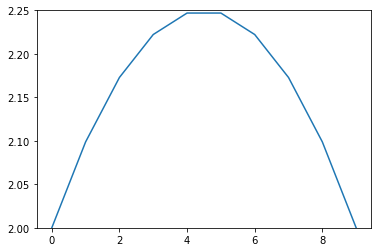

Fotograma 50


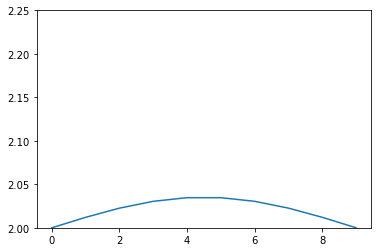

In [70]:
# Datos
a, b = 0, 1
nx=10
x_i = np.linspace(a,b,nx)
def q0(x): return 2-(x-a)*(x-b)
Q0 = q0(x_i)

# Test
nt = 100
Q = difusion1D_MVF(a,b, beta=1, Q_inicial=Q0, dx=x_i[1]-x_i[0], dt=0.004, nt=nt)

fotogramas_a_mostrar = list(range(0,nt,50))
for i in fotogramas_a_mostrar:
    print(f"Fotograma {i}")
    plt.ylim((2,2.25))
    plt.plot(Q[i,:])
    plt.show()

# Animación

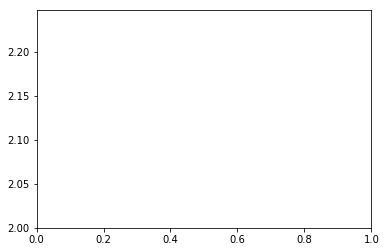

In [86]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( a, b))
y_m = min(Q[0,:])
y_M = max(Q[0,:])
ax.set_ylim( (y_m, y_M) )

line, = ax.plot([], [], lw=2)
# Pulsar tecla 'o' para suprimir la salida de esta celda

In [87]:
# Initialization function, which plots the background of each frame:
def init():
    line.set_data([], [])
    return (line,)

# Animation function, which is called for each new frame:
def animate(i):
    y_i = Q[i,:]
    line.set_data(x_i, y_i)
    return (line,)

# Compile the animation. Setting blit=True will only re-draw
# the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=20, 
                               blit=True)

In [88]:
HTML(anim.to_jshtml())

In [85]:
v=np.linspace(0,1)
min(v)

0.0